In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Roboto&effect=3d|brick-sign|');
span {font-family:Roboto; color:black; text-shadow:4px 4px 4px #aaa;}  
h1,h2 {font-family:Roboto; color:slategray; text-shadow:4px 4px 4px #aaa;} 
div.output_subarea, div.output_area pre{font-family:Roboto; font_size:120%; color:darkblue;}
</style> 

In [2]:
import math, sympy, numpy
from sympy import *
sympy.init_printing(use_unicode=True)
import pylab as plt
%matplotlib inline

[GeoGebra](https://www.geogebra.org/graphing?lang=en)

[LaTeX/Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

[Math24.ru. Ряды Тейлора и Маклорена](http://www.math24.ru/%D1%80%D1%8F%D0%B4%D1%8B-%D1%82%D0%B5%D0%B9%D0%BB%D0%BE%D1%80%D0%B0-%D0%B8-%D0%BC%D0%B0%D0%BA%D0%BB%D0%BE%D1%80%D0%B5%D0%BD%D0%B0.html)

[Math24.ru. Бесконечно малые функции](http://www.math24.ru/%D0%B1%D0%B5%D1%81%D0%BA%D0%BE%D0%BD%D0%B5%D1%87%D0%BD%D0%BE-%D0%BC%D0%B0%D0%BB%D1%8B%D0%B5-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8.html)

[Math24.ru. Точки разрыва функции](http://www.math24.ru/%D1%82%D0%BE%D1%87%D0%BA%D0%B8-%D1%80%D0%B0%D0%B7%D1%80%D1%8B%D0%B2%D0%B0-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8.html)

[ SymPy Modules Reference. Calculus](https://docs.sympy.org/latest/modules/calculus/index.html)

[Sympy : Symbolic Mathematics in Python](https://www.scipy-lectures.org/advanced/sympy.html)

# Вариант 22

# Дифференцирование и приложения

## Типовой расчет №1

Исходя из определения производной, найти $f'(0)$.

$\large{\displaystyle{ f(x) = \begin{cases}
x + \arcsin\Big[ x^2 \sin\Big(\frac{6}{x}\Big)\Big],  \forall x: x \neq 0 \\
0, x = 0
\end{cases} }}$

## Решение

По определению производной

$\large{\displaystyle{ f'(0) = \lim_{\Delta x \to 0} \frac { f(0 + \Delta x) - f(0)}{ \Delta x} = \lim_{\Delta x \to 0} \frac {\Delta x + \arcsin\Big[ \Delta x^2 \sin\Big(\frac{6}{\Delta x}\Big)\Big]}{ \Delta x}}}$,

если этот предел существует и конечен.

Т.к. $\Delta x^2 \to 0$  при $\Delta x \to 0$ и $| \sin\Big(\frac{6}{\Delta x}\Big) | \leq 1$ при $\Delta x \neq 0$, 

то по теореме о произведении бесконечно малой функции на ограниченную получим при $\Delta x \to 0$:

$\large{\displaystyle{ \Delta x^2 \sin\Big(\frac{6}{\Delta x}\Big) \to 0 \implies \Delta x + \arcsin\Big[ \Delta x^2 \sin\Big(\frac{6}{\Delta x}\Big)\Big] \to 0}}$.

Числитель и знаменатель дроби стремятся к 0 при $\Delta x \to 0$, 

значит дробь является неопределенным выражением вида $\big[\frac{0}{0}\big]$ при $\Delta x \to 0$.

Для раскрытия неопределенности преобразуем функцию, 

используя формулу эквивалентности $\arcsin t \sim t$ при $t \to 0$:

$\large{\displaystyle{ f'(0) = \lim_{\Delta x \to 0} \frac {\Delta x + \Delta x^2 \sin\Big(\frac{6}{\Delta x}\big)}{ \Delta x} = \lim_{\Delta x \to 0} \big[1 + \Delta x \sin\Big(\frac{6}{\Delta x}\Big) \big] = 1 + 0 = 1}}$

Заметим, что и $\large{\displaystyle{ \Delta x \sin\Big(\frac{6}{\Delta x}\Big) \to 0 }}$ при $\Delta x \to 0$.

## Ответ

$\large{\displaystyle{f'(0) = 1}}$.

In [3]:
x = Symbol('x')
f = x + asin(x ** 2 * sin ( 6 / x))

In [4]:
f.evalf(subs={x:0})

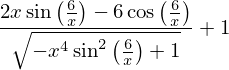

In [5]:
diff(f, x)

In [6]:
diff(f, x).subs(x, 0)

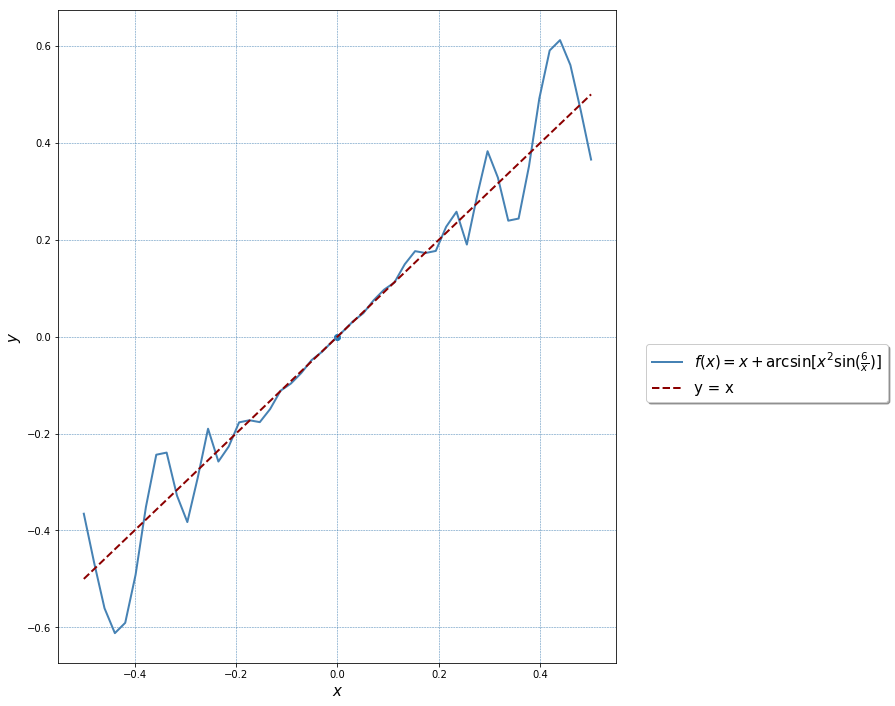

In [7]:
x = numpy.linspace(-0.5, 0.5)
f =  lambda x: x + numpy.arcsin(x ** 2 * numpy.sin( 6 / x))
flabel = r'$f(x) = x + \arcsin[ x^2 \sin(\frac{6}{x})]$'
y = numpy.piecewise(x, [x < 0, x > 0, x == 0], [f, f, 0])

plt.figure(figsize=(10,12)) ; plt.grid(c='steelblue',ls='--',lw=0.5)
plt.plot(x, y, c='steelblue', lw=2, label=flabel)
plt.plot(x, x, c='darkred',ls='--',lw=2, label='y = x')
plt.scatter(0,0)

plt.xlabel(r'$x$', fontsize=15); plt.ylabel(r'$y$', fontsize=15)
plt.legend(fontsize=15, shadow=True, bbox_to_anchor=(1.5,0.5));

## Типовой расчет №2

Составить уравнение нормали и уравнение касательной к данной кривой в точке с абсциссой $x_0$:

$\large{\displaystyle{y = 2 x^2 + 3; \ x_0 = -1}}$

## Решение

Уравнение касательной в точке $x_0$:

$\large{\displaystyle{y - f(x_0) = f'(x_0)(x - x_0)}}$.

Уравнение нормали в точке $x_0$:

$\large{\displaystyle{y - f(x_0) = -\frac{1}{f'(x_0)}(x - x_0)}}$.

В данном случае:

$\large{\displaystyle{f(x_0) = f(-1) = 2 * (-1)^2 + 3 = 5}}$;

$\large{\displaystyle{f'(x) = 4x \implies f'(x_0) = f'(-1) = 4 * (-1) = -4}}$

Уравнение касательной в точке $x_0$:

$\large{\displaystyle{y - 5 = (-4)(x - (-1)) \iff y = -4x + 1}}$.

Уравнение нормали в точке $x_0$:

$\large{\displaystyle{y - 5 = -\frac{1}{-4}(x - (-1)) \iff y = 0.25x + 5.25}}$.

In [8]:
x = Symbol('x')
f = 2 * x ** 2 + 3

In [9]:
f.evalf(subs={x:-1}), diff(f, x).evalf(subs={x:-1})

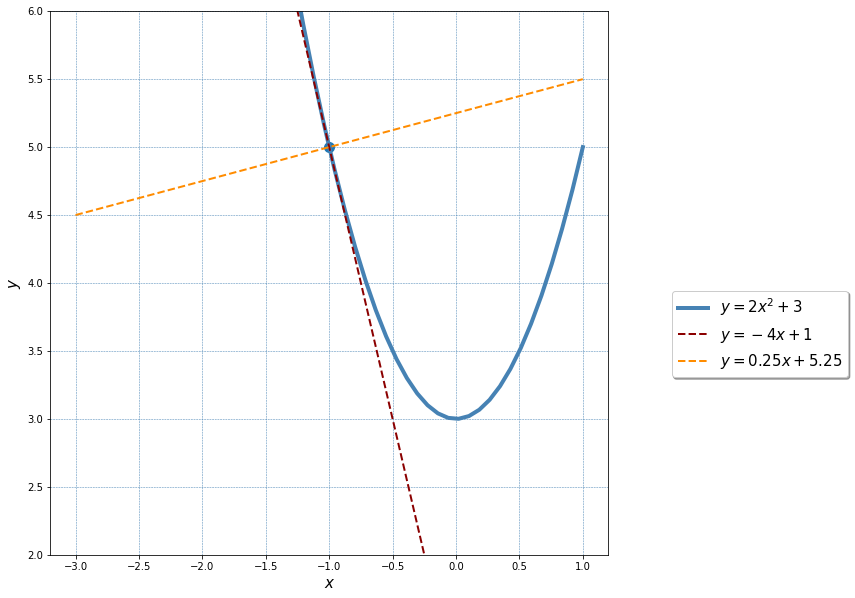

In [10]:
x = numpy.linspace(-3, 1)
f =  lambda x: 2 * x ** 2 + 3

plt.figure(figsize=(10,10)) ; plt.grid(c='steelblue',ls='--',lw=0.5)
plt.plot(x, f(x), c='steelblue', lw=4, label=r'$y = 2x^2 + 3$')
plt.plot(x, -4 * x + 1, c='darkred',ls='--',lw=2, label=r'$y = -4x + 1$')
plt.plot(x, 0.25 * x + 5.25, c='darkorange',ls='--',lw=2, label=r'$y = 0.25x + 5.25$')
plt.scatter(-1,5, s=100)

plt.xlabel(r'$x$', fontsize=15); plt.ylabel(r'$y$', fontsize=15); plt.ylim(2,6)
plt.legend(fontsize=15, shadow=True, bbox_to_anchor=(1.1,0.5));

## Типовой расчет №3

Вычислить приближенно с помощью дифференциала

$\large{\displaystyle{y = x^7; \ x = 2.002 }}$

## Решение

Функция $f(x) = x^7$ дифференцируема и непрерывна на всей числовой прямой, 

в том числев точке $x_0 = 2$. 

Ее приращение в этой точке равно:

$f(x_0 + \Delta x) - f(x_0) = f'(x_0) \Delta x + \overline{o}(\Delta x), \ \Delta x \to 0, \overline{o}(\Delta x) \to 0$, причем 

$\overline{o}(\Delta x)$ - бесконечно малая функция более высокого порядка, чем $f'(x_0) \Delta x$ при $\Delta x \to 0$.

Значит, справедливо приближенное равенство:

$f(x_0 + \Delta x) - f(x_0) \approx f'(x_0) \Delta x = df(x_0)$, где

$df(x_0)$ - дифференциал функции в точке $x_0$.

Т.е. $f(x_0 + \Delta x) \approx f(x_0) + df(x_0)$.

$x_0 = 2; \ x = 2.002 \implies \Delta x = x - x_0 = 2.002 - 2 = 0.002$

$f(x_0) = f(2) = 2^7 = 128$

$f'(x) = 7 * x^6 \implies f'(x_0) = f'(2) = 7 * 64 = 448$

$f(x_0 + \Delta x) = f(2.002) \approx f(x_0) + df(x_0) = 128 + 448 * 0.002 = 128.896$

In [17]:
x = Symbol('x')
f = x ** 7

In [18]:
f.evalf(subs={x:2}), diff(f, x).evalf(subs={x:2})

In [15]:
7 * 2 ** 6 * 0.002 + 128, 2.002 ** 7

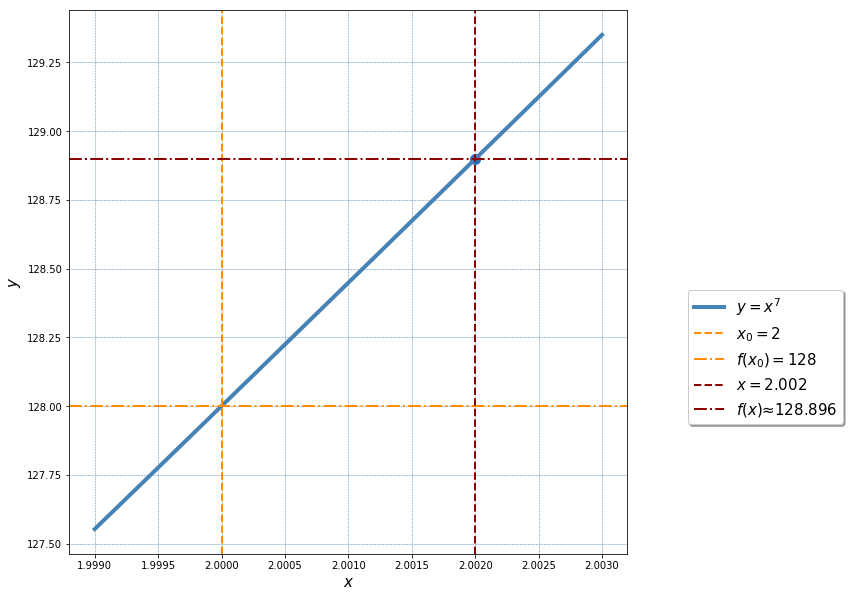

In [32]:
x = numpy.linspace(1.999, 2.003)
f =  lambda x: x ** 7

plt.figure(figsize=(10,10)) ; plt.grid(c='steelblue',ls='--',lw=0.5)
plt.plot(x, f(x), c='steelblue', lw=4, label=r'$y = x^7$')
plt.axvline(2,c='darkorange',ls='--',lw=2, label=r'$x_0 = 2$')
plt.axhline(f(2),c='darkorange',ls='-.',lw=2, label=r'$f(x_0) = 128$')
plt.axvline(2.002,c='darkred',ls='--',lw=2, label=r'$x = 2.002$')
plt.axhline(f(2.002),c='darkred',ls='-.',lw=2, label=r'$f(x) ≈ 128.896$')

plt.scatter(2.002,f(2.002), s=100)
plt.xlabel(r'$x$', fontsize=15); plt.ylabel(r'$y$', fontsize=15); 
plt.legend(fontsize=15, shadow=True, bbox_to_anchor=(1.4,0.5));

## Типовой расчет №4

Найти производную

$\large{\displaystyle{y = \frac{x^6 + x^3 - 2}{\sqrt{1 - x^3}} }}$

## Типовой расчет №5

Найти производную

$\large{\displaystyle{y = \frac{1}{2}\sqrt{\frac{1}{x^2} - 1} - \frac{\arccos x}{2x^2} }}$